# Planning for your big family vacation in Hawaii based on Airbnb data
## Part 1 - When and where to go

In this Part-1 notebook, Hawaii Airbnb data is analyzed to answer two questions regarding a big family vacation (6 adults or more). Airbnb listings data in Hawaii as of 10 June, 2023 (data source: http://insideairbnb.com/get-the-data/) is used.  
  
Here, "big family" is defined as a group of guests that
- is equal to or larger than 6
- requires entire place
- requires three or more bedroooms

## Table of Contents
<ul>
<li><a href="#Question 1">Question 1: What is the most popular neighborhood for a big family vacation with Airbnb in Hawaii?</a></li>
<li><a href="#Question 2">Question 2: What are the busiest times of the year to visit the top 10 popular neighborhoods? By how much do prices spike?</a></li>
</ul>

<a id='Question 1'></a>
# Question 1: What is the most popular neighborhood for a big family vacation with Airbnb in Hawaii?

In this analysis, the neighborhood that has the most supply of big-family housing is considered as most popular.

In [223]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data wrangling

In [224]:
# load the data set
df_listing = pd.read_csv('listings.csv')

In [225]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,81566.0,https://www.airbnb.com/rooms/81566,2.023060e+13,6/11/2023,city scrape,Rental unit in Haleiwa · ★4.67 · 2 bedrooms · ...,2 bedroom/1 bath ocean view & beach access<br ...,There are so many awesome things to do on the ...,https://a0.muscache.com/pictures/555752/35365a...,442490,...,4.75,4.86,4.62,ta-020-657-9712-01,f,1,1,0,0,1.76
1,81582.0,https://www.airbnb.com/rooms/81582,2.023060e+13,6/11/2023,city scrape,Home in Pāhoa · ★4.94 · 2 bedrooms · 3 beds · ...,Quaint retreat COTTAGE; entire 2 bedroom 1 ba...,This is a quaint neighborhood nestled in the O...,https://a0.muscache.com/pictures/555927/be245b...,442698,...,4.94,4.94,4.83,STVR-19-355130,f,2,2,0,0,1.27
2,83221.0,https://www.airbnb.com/rooms/83221,2.023060e+13,6/11/2023,city scrape,Cabin in Pāhoa · ★4.93 · 1 bedroom · 1 bed · 1...,The Enchanting Rainforest Hideaway is a very ...,NaN,https://a0.muscache.com/pictures/568427/f7ce56...,451536,...,4.96,4.86,4.94,STVR-19-364512,f,1,1,0,0,2.11
3,5269.0,https://www.airbnb.com/rooms/5269,2.023060e+13,6/11/2023,city scrape,Rental unit in Kamuela · ★4.65 · 1 bedroom · 1...,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,...,4.88,5.00,4.85,119-269-5808-01R,f,4,4,0,0,0.18
4,84405.0,https://www.airbnb.com/rooms/84405,2.023060e+13,6/11/2023,city scrape,Townhouse in Lahaina · ★4.50 · 3 bedrooms · 4 ...,Beautiful three-story condo conveniently nestl...,Location<br />Beach Proximity- short walk acro...,https://a0.muscache.com/pictures/miso/Hosting-...,461037,...,4.50,4.89,4.36,"430020680004, TA-176-565-6576-01",f,22,22,0,0,0.27


In [226]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32597 entries, 0 to 32596
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            32597 non-null  float64
 1   listing_url                                   32597 non-null  object 
 2   scrape_id                                     32597 non-null  float64
 3   last_scraped                                  32597 non-null  object 
 4   source                                        32597 non-null  object 
 5   name                                          32597 non-null  object 
 6   description                                   32450 non-null  object 
 7   neighborhood_overview                         17729 non-null  object 
 8   picture_url                                   32597 non-null  object 
 9   host_id                                       32597 non-null 

It is found that 'id' is the same as the last digit in 'listing_url'. To ensure that each listing is separate with no duplicate, these two columns should be checked.

### Check 'id' and 'listing_url' columns

In [227]:
# number of unique components
df_listing['id'].nunique(), df_listing['listing_url'].str.split('/').str[-1].nunique()

(30516, 32597)

In [228]:
# check the duplicates in 'id' column
sum(df_listing['id'].duplicated())

2081

The difference of 2081 in the number of unique values was found between 'id' and 'listing_url'. 'listing_id' column will be created by taking the last digit after '/' in 'listing_url' column to consider actual listings without duplicates.

In [229]:
# create 'listing_id' column
df_listing_clean = df_listing.copy()
df_listing_clean['listing_id'] = df_listing_clean['listing_url'].str.split('/').str[-1]

### Select relevant columns to Question 1

The descriptions of each column can be found here (https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596).  
To answer the posed question, only relevant columns will be selected and the dataframe will be cleaned, accordingly.

In [230]:
# select the relevant columns to the first question
selected_cols_q1 = ['listing_id','neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type',\
                    'accommodates','bedrooms','beds']
df_listing_clean = df_listing_clean[selected_cols_q1].copy()

- neighbourhood_cleansed: The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.  
- neighbourhood_group_cleansed: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.  
- property_type: Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field  
- room_type: [Entire home/apt|Private room|Shared room|Hotel] (https://www.airbnb.com/help/article/5/what-does-the-room-type-of-a-listing-mean)  
- accommodates: The maximum capacity of the listing  
- bedrooms: The number of bedrooms  
- beds: The number of bed(s)

In [231]:
df_listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32597 entries, 0 to 32596
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   listing_id                    32597 non-null  object 
 1   neighbourhood_cleansed        32597 non-null  object 
 2   neighbourhood_group_cleansed  32597 non-null  object 
 3   property_type                 32597 non-null  object 
 4   room_type                     32597 non-null  object 
 5   accommodates                  32597 non-null  int64  
 6   bedrooms                      26986 non-null  float64
 7   beds                          32148 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.0+ MB


Distinct values in each column are shown below.

In [232]:
df_listing_clean.neighbourhood_cleansed.value_counts()

Primary Urban Center     6683
Lahaina                  5146
Kihei-Makena             4429
North Kona               3635
North Shore Kauai        2043
South Kohala             1566
Koloa-Poipu              1519
Puna                     1289
Kapaa-Wailua              894
Ewa                       638
Lihue                     612
Koolauloa                 564
South Hilo                558
Koolaupoko                507
North Shore Oahu          435
South Kona                278
Waianae                   274
Wailuku-Kahului           239
Kau                       238
Paia-Haiku                219
Molokai                   195
East Honolulu             194
North Kohala              122
Hamakua                    82
Hana                       76
North Hilo                 49
Makawao-Pukalani-Kula      45
Central Oahu               39
Waimea-Kekaha              21
Lanai                       8
Name: neighbourhood_cleansed, dtype: int64

In [233]:
df_listing_clean.neighbourhood_group_cleansed.value_counts()

Maui        10357
Honolulu     9334
Hawaii       7817
Kauai        5089
Name: neighbourhood_group_cleansed, dtype: int64

In [234]:
df_listing_clean.property_type.value_counts()

Entire condo                 15685
Entire rental unit            4415
Entire home                   3736
Entire serviced apartment     1443
Private room in resort         854
                             ...  
Earthen home                     1
Ranch                            1
Private room in chalet           1
Shared room in hut               1
Cycladic home                    1
Name: property_type, Length: 90, dtype: int64

In [235]:
df_listing_clean.room_type.value_counts()

Entire home/apt    29080
Private room        3401
Hotel room            69
Shared room           47
Name: room_type, dtype: int64

In [236]:
df_listing_clean.room_type.value_counts()

Entire home/apt    29080
Private room        3401
Hotel room            69
Shared room           47
Name: room_type, dtype: int64

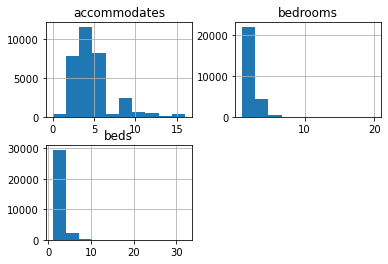

In [237]:
df_listing_clean.hist();

### Filter the data for a big family housing

The conditions for a big family housing in terms of the columns in the dataframe are below:
- is equal to or larger than 6 -> 'accommodates' >= 6
- requires entire place -> 'room_type' == 'Entire home/apt'
- requires three or more bedroooms -> 'bedrooms' >= 3 and 'beds' >= 3

In [238]:
# filter the conditions above
df_listing_clean = df_listing_clean.query('accommodates >= 6 and room_type == "Entire home/apt"\
                                           and bedrooms >= 3 and beds >= 3')

In [239]:
# assess the dataframe again
df_listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550 entries, 4 to 32589
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   listing_id                    4550 non-null   object 
 1   neighbourhood_cleansed        4550 non-null   object 
 2   neighbourhood_group_cleansed  4550 non-null   object 
 3   property_type                 4550 non-null   object 
 4   room_type                     4550 non-null   object 
 5   accommodates                  4550 non-null   int64  
 6   bedrooms                      4550 non-null   float64
 7   beds                          4550 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 319.9+ KB


In conclusion, there are 4550 listings that met the requirements for a big family housing out of 32597.

## EDA and data visualization

In [240]:
df_listing_clean.neighbourhood_cleansed.value_counts()

Lahaina                  600
North Kona               550
South Kohala             498
Koloa-Poipu              425
North Shore Kauai        419
Primary Urban Center     368
Kihei-Makena             321
Puna                     208
Koolauloa                173
Koolaupoko               160
Ewa                      143
North Shore Oahu         123
South Hilo                93
East Honolulu             89
Waianae                   88
Kapaa-Wailua              70
South Kona                51
Kau                       30
Paia-Haiku                28
North Kohala              26
Lihue                     25
Central Oahu              13
Hamakua                   10
North Hilo                 9
Wailuku-Kahului            8
Waimea-Kekaha              7
Hana                       7
Makawao-Pukalani-Kula      5
Molokai                    2
Lanai                      1
Name: neighbourhood_cleansed, dtype: int64

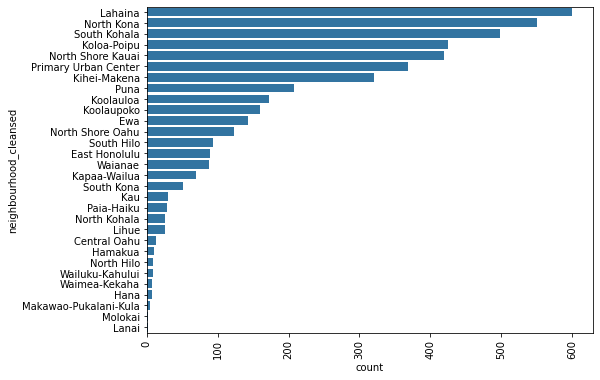

In [241]:
# plot of the popular neighborhood for a big-family vacation Airbnb housing
base_color = sns.color_palette()[0]
freq_order = df_listing_clean['neighbourhood_cleansed'].value_counts().index
plt.figure(figsize=(8, 6))
sns.countplot(data=df_listing_clean, y='neighbourhood_cleansed', color=base_color, order=freq_order)
plt.xticks(rotation=90);

<a id='Question 2'></a>
# Question 2: What are the busiest times of the year to visit the top 10 popular neighborhoods? By how much do prices spike?

The 10 popular neighborhoods of Airbnb housing for a big-family vacation were investigated above. I will now study what times are the busiest to visit these places and how much prices spike during that season.

Here, we introduce another dataset file 'calendar.csv' that includes information on date and price. To answer the question, pricing data on different dates will be used. The busiest times will be assumed as the highest-price seasons of the year.

In [242]:
# load the data set
df_calendar = pd.read_csv('calendar.csv')

## Steps:
- Match the listing ids to top 10 neighborhoods and merge them into the calendar file 
- Investigate how the listing prices change with time of the year
- Determine the peak season and the price

## Data wrangling

In [243]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,300379,2023-06-11,f,$80.00,$80.00,3.0,28.0
1,81566,2023-06-11,f,$250.00,$250.00,4.0,1125.0
2,81566,2023-06-12,f,$250.00,$250.00,4.0,1125.0
3,81566,2023-06-13,f,$250.00,$250.00,4.0,1125.0
4,81566,2023-06-14,f,$250.00,$250.00,4.0,1125.0


In [244]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11897912 entries, 0 to 11897911
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 635.4+ MB


### Change the data types and add a new column for time (year-month)

In [245]:
# change the data type of listing_id to integer from object
df_listing_clean['listing_id'] = df_listing_clean['listing_id'].astype('int64')

In [246]:
# change the data type of price to float from object
df_calendar_clean = df_calendar.copy()
df_calendar_clean['price'] = df_calendar_clean['price'].str.replace(',','').str.split('$').str[-1].astype('float')

In [247]:
# change the data type of 'date' to datetime from object
df_calendar_clean['date'] = pd.to_datetime(df_calendar_clean['date'])

In [248]:
# add a new column 'year_month' extracted from 'date' column 
df_calendar_clean['year_month'] = df_calendar_clean.date.dt.to_period('M')

### Merge the two dataframes

In [249]:
# merge the two dataframes
df_top_10_calendar = pd.merge(df_listing_clean[['listing_id']], df_calendar_clean, on='listing_id', how='inner').copy()

In [250]:
# check if any listings are missed from the new merged dataframe
df_listing_clean[~df_listing_clean['listing_id'].isin(df_top_10_calendar['listing_id'])]['listing_id']

Series([], Name: listing_id, dtype: int64)

In [251]:
# check if # of unique ids is the same as the df_listing_clean
assert (df_top_10_calendar['listing_id'].nunique() == df_listing_clean['listing_id'].nunique())

In [252]:
df_top_10_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660752 entries, 0 to 1660751
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      1660752 non-null  int64         
 1   date            1660752 non-null  datetime64[ns]
 2   available       1660752 non-null  object        
 3   price           1660752 non-null  float64       
 4   adjusted_price  1660752 non-null  object        
 5   minimum_nights  1660744 non-null  float64       
 6   maximum_nights  1660744 non-null  float64       
 7   year_month      1660752 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(2), period[M](1)
memory usage: 114.0+ MB


## EDA and data visualization

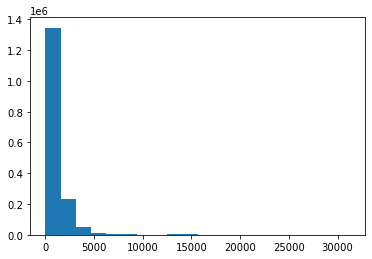

In [253]:
# draw a histogram of the price
plt.hist(df_top_10_calendar['price'], bins=20);

As the distribution of the price is right-skewed, we expect the mean would be higher than the median.

In [254]:
# make a dataframe for mean and median prices of each month for top 10 neighborhoods
df_top_10_price = pd.DataFrame(df_top_10_calendar.groupby('year_month')['price'].mean()).reset_index()
df_top_10_price = df_top_10_price.rename(columns={'price':'mean_price'})
df_top_10_price['median_price'] = df_top_10_calendar.groupby('year_month')['price'].median().reset_index()['price']
df_top_10_price['std'] = df_top_10_calendar.groupby('year_month')['price'].std().reset_index()['price']

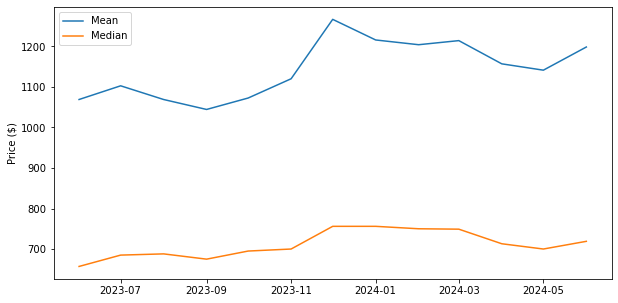

In [255]:
# draw a time series plot for the mean and median prices
plt.figure(figsize=[10,5])
plt.errorbar(df_top_10_price['year_month'].dt.to_timestamp(), df_top_10_price['mean_price'], label='Mean')
plt.errorbar(df_top_10_price['year_month'].dt.to_timestamp(), df_top_10_price['median_price'], label='Median')
plt.ylabel('Price ($)')
# plt.ylim([500,1500])
plt.legend(loc='upper left')
plt.show()

As shown in the plot above, the peak season in terms of accommodation for a big family is December. After a peak in December, it is also observed higher prices are retained throughout 2024 than in 2023.